<a href="https://colab.research.google.com/github/kevilamorais/pln/blob/main/Reconhecimento_de_Emo%C3%A7%C3%B5es_em_Tweets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

df = pd.read_pickle("merged_training.pkl")

In [ ]:
type(df)

pandas.core.frame.DataFrame

In [ ]:
df.head()

,text,emotions
27383,i feel awful about it too because it s my job ...,sadness
110083,im alone i feel awful,sadness
140764,ive probably mentioned this before but i reall...,joy
100071,i was feeling a little low few days back,sadness
2837,i beleive that i am much more sensitive to oth...,love


In [ ]:
len(df)

416809

<Axes: >

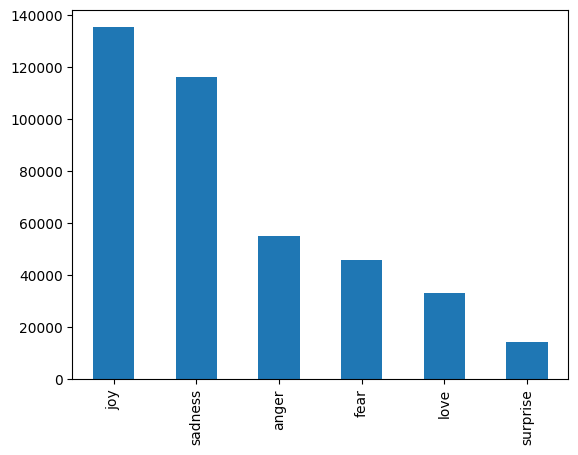

In [ ]:
data= df[df["emotions"].isin(df.emotions)]
data = data.sample(n=400000);

data.emotions.value_counts().plot.bar()

In [ ]:
df.emotions.unique()

array(['sadness', 'joy', 'love', 'anger', 'fear', 'surprise'],
      dtype=object)

In [ ]:
#Aula2 - Expressões regulares

sem_html = re.sub(r'<.*?>', '', html)

In [ ]:
#Aula2 - pre_processamento_spacy

def preprocessar_textos(textos_):

  nlp = spacy.load('pt_core_news_sm')
  
  textos_processados = []

  with tqdm(total=len(textos_), colour='green', desc='Processando') as pbar:
    
    for texto in textos_:
      
      texto = re.sub(r'@\w+', '', texto)

      doc = nlp(texto)

      tokens = [t.lemma_.lower() for t in doc if t.pos_ != 'SPACE' and t.pos_ != 'PUNCT']

      novo_texto = ' '.join(tokens)

      textos_processados.append(novo_texto)

      pbar.update(1)
  
  return textos_processados

In [ ]:
#Aula3 - analise_sentimentos

X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(textos_vetorizados, labels, test_size=0.2, shuffle=True, random_state=0)

    print('\n\nTreinamento:', len(X_treinamento), '-', len(y_treinamento))
    print('Teste:', len(X_teste), '-', len(y_teste))

    classificadores = {
        'LogisticRegression': LogisticRegression(),
        'MultinomialNB': MultinomialNB(),
        'KNN': KNeighborsClassifier(3),
        'SVM Linear': SVC(kernel='linear', C=0.025),
        'SVC RBF': SVC(gamma=2, C=1),
        'Decision Tree': DecisionTreeClassifier(max_depth=5),
        'Random Forest': RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
        'MLP': MLPClassifier(alpha=1, max_iter=1000),  
    }

    print('\n\nAvaliação dos Classificadores\n')

    for nome, classificador in classificadores.items():

        print('\nNome:', nome)

        classificador.fit(X_treinamento, y_treinamento)

        y_pred = classificador.predict(X_teste)

        report = classification_report(y_teste, y_pred)

        print('  Classification Report:', report)

        print('\n  Exemplo teste:', X_teste[0])
        print('  Label real:', y_teste[0])
        print('  Label pred:', y_pred[0])

In [ ]:
#Aula3 - representacao_bow

count_vectorizer = CountVectorizer(binary=False, token_pattern=r'\w+', ngram_range=(1, 1), \
                                   max_features=None)

count_vectorizer.fit(frases)

print(f'\nVocabulário: {len(count_vectorizer.vocabulary_)} - {count_vectorizer.vocabulary_}')

print(f'\nFeatures: {count_vectorizer.get_feature_names_out()}')

frases_vetorizadas = count_vectorizer.transform(frases).toarray()

print(f'\nFrases Vetorizadas: {frases_vetorizadas}')

for f, f_v in zip(frases, frases_vetorizadas):
  print(f'\nFrase Original: {f}')
  print(f'  Frase Vetorizada: {f_v}')

In [ ]:
#Aula4 - word_embeddings

corpus = []

for i, example in enumerate(dataset['train'], start=1):
  corpus.append(example['text'].lower().split())
  if i == 1000:
    break

print(corpus[0])

model_skip.wv.most_similar('movie')